Workflow:
Importing the dataset and performing the following tasks:

1. Top 10 and last 10 entries in dataset
2. Statistical summary of each column
3. Checking the null values
4. Seperating the categorical and numerical columns
5. Creating a seperate column named company from the 'CarName' Column and deleting the CarName column
6. Making the corrections in name of company
7. Using getdummies to perform encoding
8. Applying MinMax scalar and splitting the dataset
9. Building a LinearRegression model and finding the mean squared and r squared error
10. Showing the predicted and actual values using np.column_stack() method

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
df = pd.read_csv('CarPrice_Data.csv')

# 1. Top 10 and last 10 entries in dataset

In [3]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
df.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


# 2. Statistical summary of each column

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# 3.Checking the null values

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# 4. Seperating the categorical and numerical columns

In [9]:
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()
final_categorical_feature

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [10]:
numeric_feature = df.dtypes!=object
final_numeric_feature = df.columns[numeric_feature].tolist()
final_numeric_feature

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [11]:
Company = df['CarName'].apply(lambda x : x.split()[0])
Company

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

# 5. Creating a seperate column named company from the 'CarName' Column and deleting the CarName column

In [12]:
df.insert(1, 'Company', Company)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,car_ID,Company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 6. Making the corrections in name of company

In [13]:
df['Company'].replace('alfa-romero', 'alfa-romeo', inplace=True)
df['Company'].replace('maxda', 'mazda', inplace=True)
df['Company'].replace('porcshce', 'porsche', inplace=True)
df['Company'].replace('toyouta', 'toyota', inplace=True)
df['Company'].replace('vokswagen', 'volkswagen', inplace=True)
df['Company'].replace('vw', 'volkswagen', inplace=True)
df['Company'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
final_categorical_feature.append('Company')
final_categorical_feature.remove('CarName')
final_categorical_feature

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Company']

# 7. Using getdummies to perform encoding

In [15]:
df_dummy = pd.get_dummies(df, prefix=final_categorical_feature, columns=final_categorical_feature, drop_first=True)
df_dummy.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,False,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df_dummy.shape

(205, 67)

In [17]:
X = df_dummy.drop("price", axis = 1)
y = df_dummy['price']

# 8. Applying MinMax scalar and splitting the dataset

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=100)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scale_target = MinMaxScaler()
y_train = pd.DataFrame(y_train)
y_train = scale_target.fit_transform(y_train)
y_test = pd.DataFrame(y_test)
y_test = scale_target.transform(y_test)

# 9. Building a LinearRegression model and finding the mean squared and r squared error

In [21]:
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_lr)
print("R-squared :", r2_lr)

Mean Squared Error: 0.009725329964857402
R-squared : 0.8345982480762545


# 10. Showing the predicted and actual values using np.column_stack() method

In [22]:
results = np.column_stack((y_test, y_pred))

print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results[:10]:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          0.07 |          0.11
          0.09 |          0.11
          0.10 |          0.15
          0.12 |          0.10
          0.07 |          0.00
          0.17 |          0.16
          0.37 |          0.36
          0.31 |          0.19
          0.35 |          0.32
          0.33 |          0.30


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial regression of degree 2
model_degree_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_degree_2.fit(X_train, y_train)

# Polynomial regression of degree 3
model_degree_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_degree_3.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [24]:
y_pred_degree_2 = model_degree_2.predict(X_test)
y_pred_degree_3 = model_degree_3.predict(X_test)

# Calculate mean squared error
mse_degree_2 = mean_squared_error(y_test, y_pred_degree_2)
mse_degree_3 = mean_squared_error(y_test, y_pred_degree_3)

print("MSE (degree 2):", mse_degree_2)
print("MSE (degree 3):", mse_degree_3)

MSE (degree 2): 0.24424217103018997
MSE (degree 3): 0.22730989483512948


In [25]:
print("The result of the Multiple Regression Model:")
print("Mean Squared Error:", mse_lr)
print("R-squared (Coefficient of Determination):", r2_lr)

print("-" * 50, "\n")

print("The result of the Polynomial Model:")
print("MSE (Degree 2):", mse_degree_2)
print("MSE (Degree 3):", mse_degree_3)

The result of the Multiple Regression Model:
Mean Squared Error: 0.009725329964857402
R-squared (Coefficient of Determination): 0.8345982480762545
-------------------------------------------------- 

The result of the Polynomial Model:
MSE (Degree 2): 0.24424217103018997
MSE (Degree 3): 0.22730989483512948


In [26]:
from sklearn.linear_model import LinearRegression, Ridge

# Define Ridge Regression model
ridge = Ridge()

# Define hyperparameters for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV for hyperparameter tuning
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Get best hyperparameters
best_alpha = ridge_cv.best_params_['alpha']

# Train Ridge Regression model with best hyperparameters
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = ridge.predict(X_train)

# Make predictions on the test set
y_test_pred = ridge.predict(X_test)

# Evaluate the model on training data
train_mse_Ridge = mean_squared_error(y_train, y_train_pred)
train_r2_Ridge = r2_score(y_train, y_train_pred)

# Evaluate the model on test data
test_mse_Ridge = mean_squared_error(y_test, y_test_pred)
test_r2_Ridge = r2_score(y_test, y_test_pred)

print("Training Mean Squared Error (MSE):", train_mse_Ridge)
print("Test Mean Squared Error (MSE):", test_mse_Ridge)

print("Training R-squared (R2) Score:", train_r2_Ridge)
print("Test R-squared (R2) Score:", test_r2_Ridge)

Training Mean Squared Error (MSE): 0.001410361326291947
Test Mean Squared Error (MSE): 0.005000576918187505
Training R-squared (R2) Score: 0.9685728357360734
Test R-squared (R2) Score: 0.9149536122798498


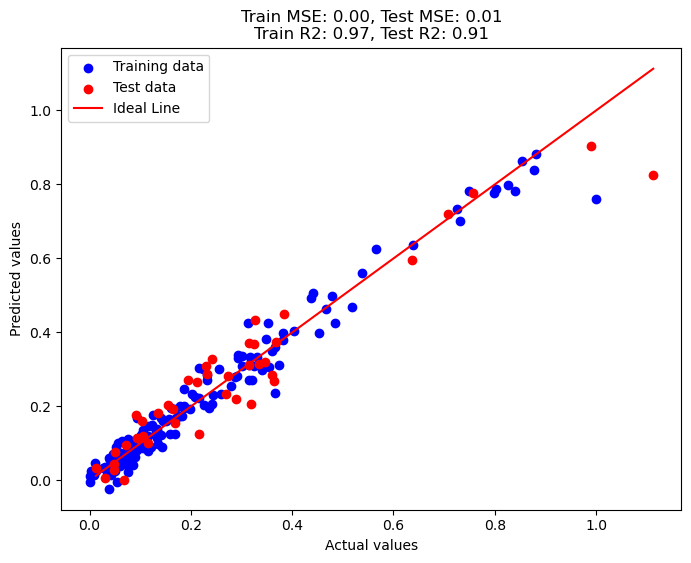

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(y_train, y_train_pred, color='blue', label='Training data')
ax.scatter(y_test, y_test_pred, color='red', label='Test data')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')

ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title(f'Train MSE: {train_mse_Ridge:.2f}, Test MSE: {test_mse_Ridge:.2f}\nTrain R2: {train_r2_Ridge:.2f}, Test R2: {test_r2_Ridge:.2f}')
ax.legend()

# Plotting
plt.show()
